# Importing important libraries

In [56]:
# Importing the libraries

import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
warnings.filterwarnings('ignore')


In [57]:
pd.set_option("display.max_columns", None)
pd.set_option("max_colwidth", None)
pd.set_option("display.float_format", lambda x: "%.2f" % x)


# Reading the data

In [58]:
df_train = pd.read_csv(r"C:\Users\ds12\ML Assign\Data Sets\titanic_train.csv")
df_train.head()
df_test1 = pd.read_csv(r"C:\Users\ds12\ML Assign\Data Sets\titanic_test.csv")
df_test2 = pd.read_csv(r"C:\Users\ds12\ML Assign\Data Sets\gender_baseline.csv")
# Joining df_test1 and df_test2 on PassengerId column

df_test = pd.merge(df_test1, df_test2, on = "passenger_id", how = "left")


# Exploratory Data Analysis

In [59]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  850 non-null    int64  
 1   pclass        850 non-null    int64  
 2   name          850 non-null    object 
 3   sex           850 non-null    object 
 4   age           676 non-null    float64
 5   sibsp         850 non-null    int64  
 6   parch         850 non-null    int64  
 7   ticket        850 non-null    object 
 8   fare          849 non-null    float64
 9   cabin         191 non-null    object 
 10  embarked      849 non-null    object 
 11  boat          308 non-null    object 
 12  body          73 non-null     float64
 13  home.dest     464 non-null    object 
 14  survived      850 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 99.7+ KB


In [60]:
df_train.describe()


,passenger_id,pclass,age,sibsp,parch,fare,body,survived
count,850.00,850.00,676.00,850.00,850.00,849.00,73.00,850.00
mean,662.82,2.32,29.52,0.52,0.38,34.01,165.82,0.37
std,380.75,0.84,14.56,1.11,0.88,53.71,99.07,0.48
min,1.00,1.00,0.17,0.00,0.00,0.00,4.00,0.00
25%,332.25,2.00,20.00,0.00,0.00,7.90,75.00,0.00
50%,676.50,3.00,28.00,0.00,0.00,14.11,166.00,0.00
75%,992.25,3.00,37.00,1.00,0.00,31.00,260.00,1.00
max,1307.00,3.00,80.00,8.00,9.00,512.33,328.00,1.00


In [61]:
# Checking for missing values
df_train.isna().sum().sort_values(ascending=False)


body            777
cabin           659
boat            542
home.dest       386
age             174
fare              1
embarked          1
passenger_id      0
pclass            0
name              0
sex               0
sibsp             0
parch             0
ticket            0
survived          0
dtype: int64

In [62]:
df_test.isna().sum().sort_values(ascending=False)

body            411
cabin           355
boat            281
home.dest       178
age              89
embarked          1
passenger_id      0
pclass            0
name              0
sex               0
sibsp             0
parch             0
ticket            0
fare              0
survived          0
dtype: int64

In [63]:
# Dropping the columns with more than 50% missing values and some other columns which are not required
df_train.drop(['passenger_id',"boat", "body", "cabin", "name",
        "home.dest", "ticket"], axis=1, inplace=True)
df_test.drop(['passenger_id',"boat", "body", "cabin", "name",
        "home.dest", "ticket"], axis=1, inplace=True)

In [64]:
# Filling the missing values in the age feature with the mean value
df_train["age"].fillna(df_train["age"].mean(), inplace=True)
df_test['age'].fillna(df_test['age'].mean(), inplace=True)
# Convert the age feature to int
df_train["age"] = df_train["age"].astype(int)
df_test["age"] = df_test["age"].astype(int)
# Removing data having age = 0
df_train = df_train[df_train.age != 0]
df_test = df_test[df_test.age != 0]


In [65]:
# Drop the rows with missing values
df_train.dropna(inplace=True)
df_test.dropna(inplace=True)

* Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

In [66]:
df_train.head()

,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,3,female,29,0,0,7.73,Q,1
1,3,male,38,0,0,8.66,S,0
2,3,female,30,1,1,24.15,S,0
3,2,female,54,1,3,23.00,S,1
4,2,male,40,0,0,13.00,S,0


In [67]:
df_test.head()

,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,1,male,17,0,2,110.88,C,0
1,3,male,30,0,0,14.50,S,0
2,1,male,31,1,0,52.00,S,0
3,3,male,41,0,0,7.12,S,0
4,3,male,21,0,0,7.90,S,0


In [68]:
# Creating Dummy variables for the categorical features
df_train = pd.get_dummies(data=df_train, columns=["sex", "embarked"])
df_train.drop(["sex_female"], axis=1, inplace=True)

df_test = pd.get_dummies(data=df_test, columns=["sex", "embarked"])
df_test.drop(["sex_female"], axis=1, inplace=True)

In [69]:
# Converting Pclass,survived,sbisp,parch to int type of both data sets

df_train["pclass"] = df_train["pclass"].astype(int)
df_train["survived"] = df_train["survived"].astype(int)
df_train["sibsp"] = df_train["sibsp"].astype(int)
df_train["parch"] = df_train["parch"].astype(int)

df_test["pclass"] = df_test["pclass"].astype(int)
df_test["survived"] = df_test["survived"].astype(int)
df_test["sibsp"] = df_test["sibsp"].astype(int)
df_test["parch"] = df_test["parch"].astype(int)



In [70]:
# Rearranging the columns of df making survived as the last column
col_list = list(df_train.columns)
col_list
df_train = df_train.loc[
    :,
    [
        "pclass",
        "age",
        "sibsp",
        "parch",
        "fare",
        "sex_male",
        "embarked_C",
        "embarked_Q",
        "embarked_S",
        "survived",
    ],
]

df_test = df_test.loc[
    :,
    [
        "pclass",
        "age",
        "sibsp",
        "parch",
        "fare",
        "sex_male",
        "embarked_C",
        "embarked_Q",
        "embarked_S",
        "survived",
    ],
]


In [71]:
# Splitting the data into X and y
X1 = df_train.drop(["survived"], axis=1)
y1 = df_train[["survived"]]

X2 = df_test.drop(["survived"], axis=1)
y2 = df_test[["survived"]]


# Data Visualization

'\nfor i in df.columns:\n    sns.distplot(X[i])\n    plt.show()'

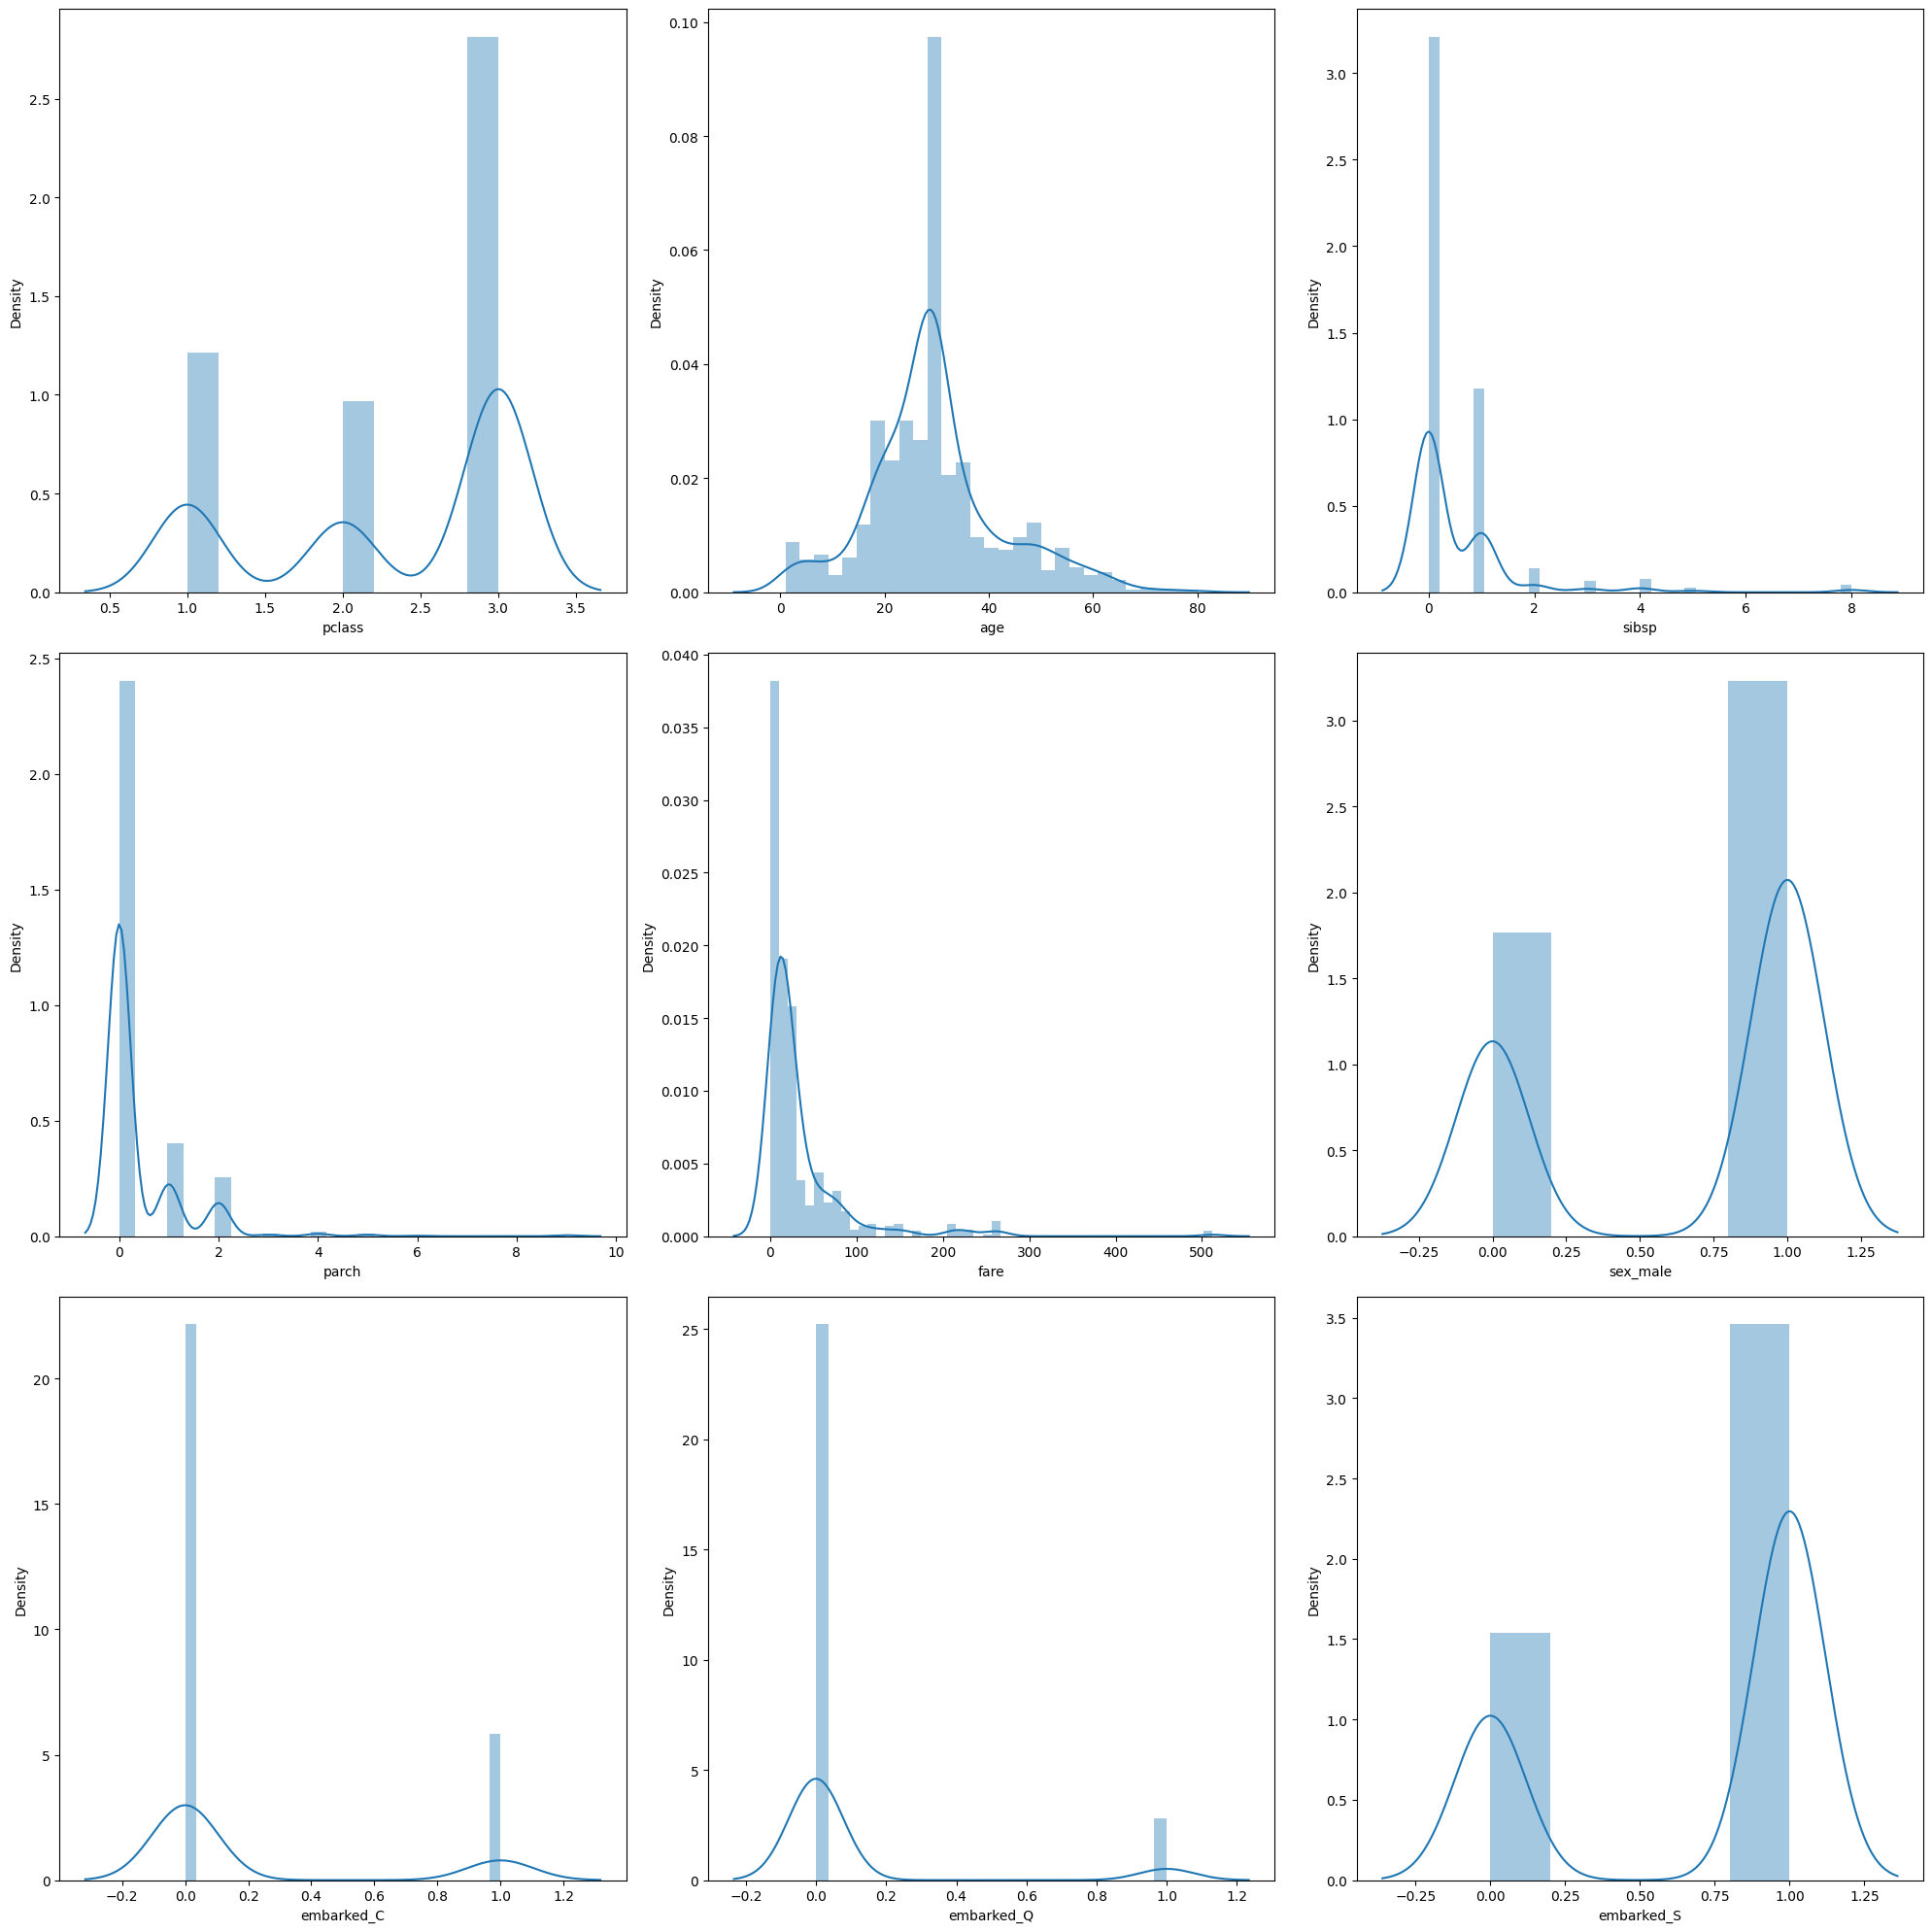

In [72]:
# Plotting the distribution of the features using subplots

fig, axes = plt.subplots(3, 3, figsize=(20, 20))
for i, ax in enumerate(fig.axes):
    if i < 9:
        sns.distplot(X1.iloc[:, i], ax=ax)
plt.tight_layout()
"""
for i in df.columns:
    sns.distplot(X[i])
    plt.show()"""


<Axes: >

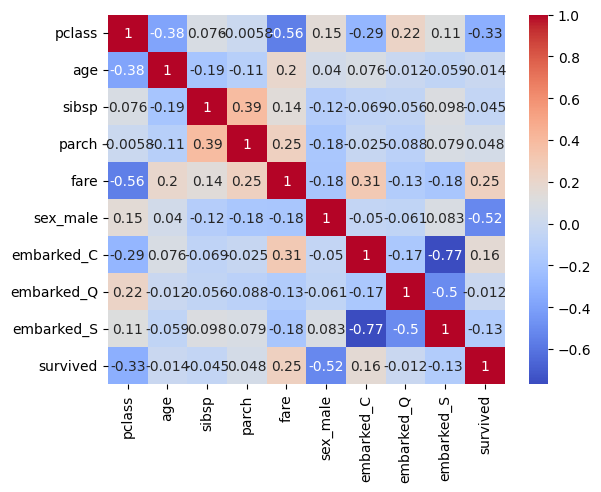

In [73]:
# Plotting the correlation matrix
sns.heatmap(df_train.corr(), annot=True, cmap="coolwarm")


## Model Building

<Axes: xlabel='survived', ylabel='count'>

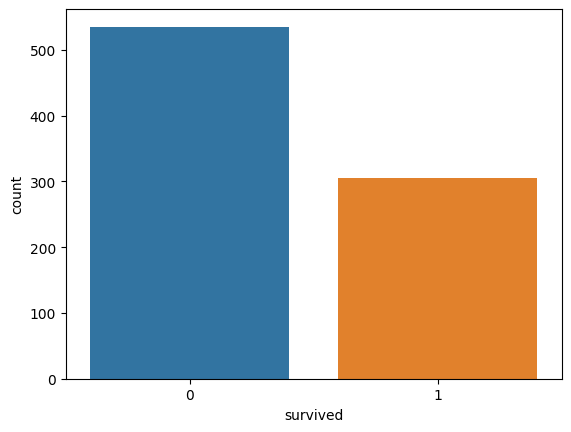

In [74]:
# Checking if the data is balanced or not
sns.countplot(x="survived", data=df_train)


In [75]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X1, y1, test_size=0.2, random_state=0, stratify=y1
)


In [76]:
# Scaling the data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
SCX_train = X_train.copy(deep=True)
SCX_val = X_val.copy(deep=True)
SCX_train[["age", "fare"]] = sc.fit_transform(SCX_train[["age", "fare"]])
SCX_val[["age", "fare"]] = sc.transform(SCX_val[["age", "fare"]])


In [77]:
# Importing the Different Machine Learning Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Importing the metrics
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    confusion_matrix,
    f1_score,
    roc_auc_score,
    precision_score,
    recall_score,
)


In [78]:
# Creating a list of model name and models
models = [
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier(n_estimators=200)),
    ("Logistic Regression", LogisticRegression()),
    ("SVM", SVC(kernel="rbf")),
    ("KNN", KNeighborsClassifier(n_neighbors=11)),
    ("Naive Bayes", GaussianNB()),
    ("XGBoost", XGBClassifier(verbosity=0)),
    ("CatBoost", CatBoostClassifier(verbose=0)),
]


# Modeling with Original Data

In [79]:
"""# Creating a dataframe to store the results
results = pd.DataFrame(
    columns=["Model", "Accuracy", "Precision",
            "Recall", "F1 Score", "ROC AUC Score"]
)
for model_name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    results = results.append(
        {
            "Model": model_name,
            "Accuracy": accuracy_score(y_val, y_pred),
            "Precision": precision_score(y_val, y_pred),
            "Recall": recall_score(y_val, y_pred),
            "F1 Score": f1_score(y_val, y_pred),
            "ROC AUC Score": roc_auc_score(y_val, y_pred),
        },
        ignore_index=True,
    )

# Printing the results
results.sort_values(by="ROC AUC Score", ascending=False)"""

# Creating a dataframe to store the results
results = {}

for model_name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    results[model_name] = {
        "Accuracy": accuracy_score(y_val, y_pred),
        "Precision": precision_score(y_val, y_pred),
        "Recall": recall_score(y_val, y_pred),
        "F1 Score": f1_score(y_val, y_pred),
        "ROC AUC Score": roc_auc_score(y_val, y_pred),
    }

# Printing the results
results = pd.DataFrame(results).T * 100
results.sort_values(by="ROC AUC Score", ascending=False)


,Accuracy,Precision,Recall,F1 Score,ROC AUC Score
XGBoost,85.12,80.00,78.69,79.34,83.74
CatBoost,83.33,81.13,70.49,75.44,80.57
Random Forest,79.76,72.13,72.13,72.13,78.12
Decision Tree,78.57,69.23,73.77,71.43,77.54
Logistic Regression,77.38,69.49,67.21,68.33,75.20
Naive Bayes,73.81,63.49,65.57,64.52,72.04
KNN,70.24,63.41,42.62,50.98,64.30
SVM,64.29,52.17,19.67,28.57,54.70


# Modeling with Scaled Data

In [80]:
# Creating a dataframe to store the results
results = {}

for model_name, model in models:
    model.fit(SCX_train, y_train)
    y_pred = model.predict(SCX_val)
    results[model_name] = {
        "Accuracy": accuracy_score(y_val, y_pred),
        "Precision": precision_score(y_val, y_pred),
        "Recall": recall_score(y_val, y_pred),
        "F1 Score": f1_score(y_val, y_pred),
        "ROC AUC Score": roc_auc_score(y_val, y_pred),
    }

# Printing the results
results = pd.DataFrame(results).T * 100
results.sort_values(by="ROC AUC Score", ascending=False)


,Accuracy,Precision,Recall,F1 Score,ROC AUC Score
XGBoost,85.12,80.00,78.69,79.34,83.74
CatBoost,83.33,81.13,70.49,75.44,80.57
Random Forest,80.95,74.58,72.13,73.33,79.06
Decision Tree,79.17,69.70,75.41,72.44,78.36
SVM,79.17,72.41,68.85,70.59,76.95
KNN,79.76,76.47,63.93,69.64,76.36
Logistic Regression,77.98,70.69,67.21,68.91,75.66
Naive Bayes,73.81,63.49,65.57,64.52,72.04


> So in tree based models, scaling is not required. As we can see a descent accuracy with original data when we scaled the data, the accuracy decreased.

> So we will predict our test data with original data.

# Hyperparameter Tuning

In [82]:
# Grid Search CV for Random Forest with hyperparameter tuning

from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier()
# Parameters for Decision Tree

param_grid = {
    "criterion": ["gini", "entropy"],   
    "max_depth": [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, None],
    "min_samples_split": [2, 3, 4, 5, 6, 7, 8, 9, 10],
    "min_samples_leaf": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "max_features": ["auto", "sqrt", "log2", None],
}

# Creating the grid search cv

grid_search = GridSearchCV(
    estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2
)

# Fitting the model

grid_search.fit(SCX_train, y_train)

# Printing the best parameters
params = grid_search.best_params_
print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_estimator_)
print(grid_search.best_index_)

Fitting 5 folds for each of 8640 candidates, totalling 43200 fits
{'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2}
0.8348148148148148
DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5)
5346


# Predicting the values for the X2 and y2 using

In [83]:
# Scaling the X2 using standards scaler

SCX2 = X2.copy(deep=True)
SCX2[["age", "fare"]] = sc.transform(SCX2[["age", "fare"]])

In [84]:
# Predicting the values of X2 using the best model

model = DecisionTreeClassifier(**params)
model.fit(X_train, y_train)
y_pred = model.predict(X2)

# Printing the metrics

print("Accuracy Score: ", accuracy_score(y2, y_pred))
print("Precision Score: ", precision_score(y2, y_pred))
print("Recall Score: ", recall_score(y2, y_pred))
print("F1 Score: ", f1_score(y2, y_pred))
print("ROC AUC Score: ", roc_auc_score(y2, y_pred))
print('CM:\n',confusion_matrix(y2, y_pred))
print('Classification Report:\n',classification_report(y2, y_pred))

Accuracy Score:  0.8480176211453745
Precision Score:  0.8671875
Recall Score:  0.6809815950920245
F1 Score:  0.7628865979381443
ROC AUC Score:  0.8112811755528851
CM:
 [[274  17]
 [ 52 111]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.94      0.89       291
           1       0.87      0.68      0.76       163

    accuracy                           0.85       454
   macro avg       0.85      0.81      0.83       454
weighted avg       0.85      0.85      0.84       454



> If we go for hyperparameter tuning, we can get better accuracy.

> But for now, we will use the default parameters.

# Saving the model

import pickle

pickle.dump(model, open("model.pkl", "wb"))


df_train.to_csv('cleantitanic_train.csv', index=False)
df_test.to_csv('cleantitanic_test.csv', index=False)

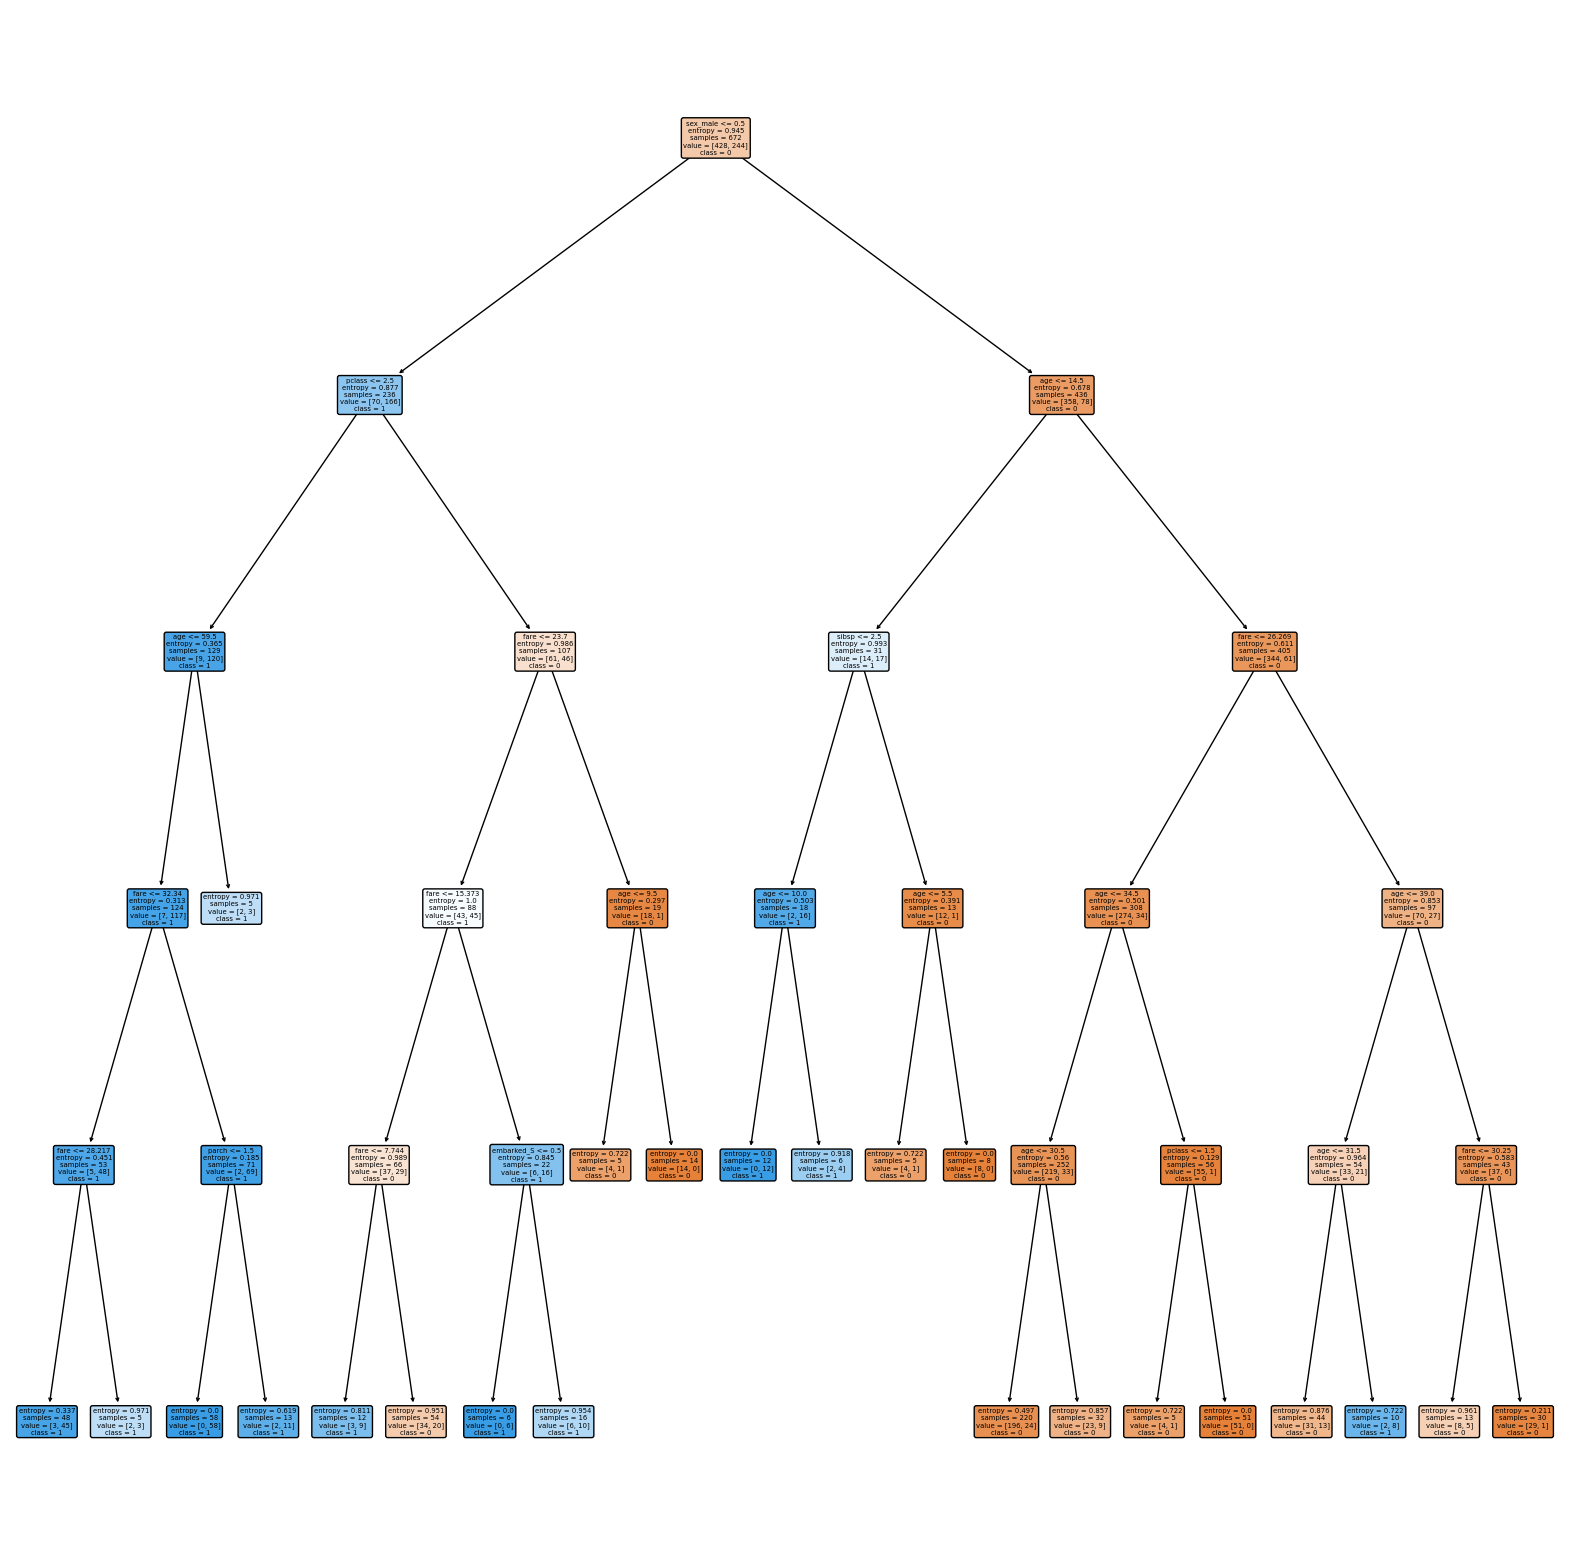

In [86]:
# Potting the decision tree without graphviz and pydotplus 

from sklearn.tree import plot_tree
plt.figure(figsize=(20,20))
plot_tree(model, filled=True, rounded=True, feature_names=X_train.columns, class_names=['0','1'])   
plt.show()
